In [1]:
# Imports necesarios
import pandas as pd                    
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

In [11]:
#Carga de datos
data=pd.read_csv(r"C:\Users\sandra\Desktop\TFG ARCHIVOS PREFINALES\Carpeta GitHub\csv\Politica.csv", encoding='latin1')
data
print('Información del archivo:')
print(data.keys())

Información del archivo:
Index(['csec', 'totalvotantes', 'totalop', 'PSOE', 'PP', 'PODEMOSIU', 'VOX',
       'CS', 'MASPAISEQUO', 'ORANGE', 'MOVISTAR', 'VODAFONE', 'JAZZTEL', 'ONO',
       'MASMOVIL', 'PEPEPHONE', 'TUENTI', 'LOWI', 'VOTOSDERECHA',
       'VOTOSIZQUIERDA', 'orangep', 'movistarp', 'vodafonep', 'jazztelp',
       'onop', 'masmovilp', 'pepephonep', 'tuentip', 'lowip', 'PSOEp', 'PPp',
       'PODEMOSp', 'VOXp', 'CSp', 'MASPAISp'],
      dtype='object')


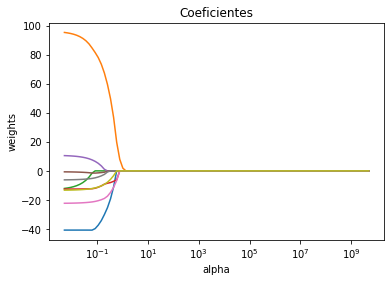

In [24]:
#CON ESTE CÓDIGO SE OBTIENEN LOS COEFICIENTES

#Definición de variables

X= data.iloc[:,9:18]

y=data["PP"]

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
#Generación de alphas
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a) #Set the parameters of this estimator.
    lasso.fit(scale(X_train), y_train) #Fit model with coordinate descent.
    coefs.append(lasso.coef_)

ax = plt.gca()
 
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.title("Coeficientes")
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

#En el gráfico de coeficientes,
#dependiendo de la elección del parámetro de ajuste alpha, 
#algunos de los coeficientes son exactamente iguales a cero


In [25]:
#Ahora realizamos una validación cruzada 20 veces para elegir el mejor alfa, reajustar el modelo 

lassocv = LassoCV(alphas = None, cv = 20, max_iter = 100000, normalize = True) #Elegir mejor alpha
#Reajuste
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

#Coeficientes
pd.Series(lasso.coef_, index=X.columns)

ORANGE       -0.610592
MOVISTAR      0.648797
VODAFONE     -0.178918
JAZZTEL      -0.490133
ONO           0.435715
MASMOVIL     -0.307870
PEPEPHONE   -21.191624
TUENTI       -5.549983
LOWI         -3.936696
dtype: float64

PP
ORANGE       -0.610592
MOVISTAR      0.648797
VODAFONE     -0.178918
JAZZTEL      -0.490133
ONO           0.435715
MASMOVIL     -0.307870
PEPEPHONE   -21.191624
TUENTI       -5.549983
LOWI         -3.936696
dtype: float64


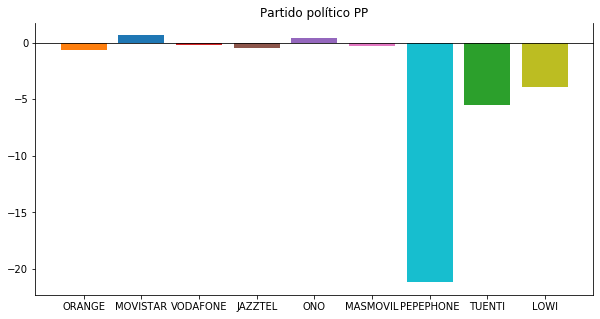

PSOE
ORANGE       0.276108
MOVISTAR    -0.305801
VODAFONE     0.073721
JAZZTEL      0.280388
ONO          0.662380
MASMOVIL     1.823414
PEPEPHONE   -1.976409
TUENTI       2.759273
LOWI         0.375945
dtype: float64


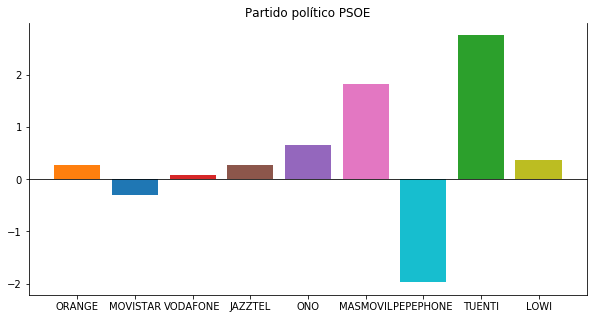

VOX
ORANGE       -0.178633
MOVISTAR      0.184119
VODAFONE      0.000000
JAZZTEL      -0.210643
ONO           0.514332
MASMOVIL     -0.685259
PEPEPHONE   -11.559705
TUENTI       -0.000000
LOWI         -1.244894
dtype: float64


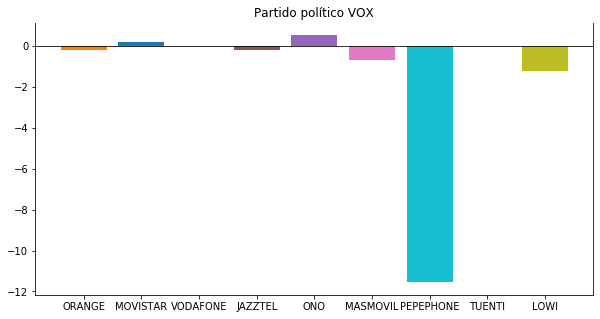

CS
ORANGE      -0.122146
MOVISTAR     0.011723
VODAFONE     0.285691
JAZZTEL     -0.222987
ONO          0.402812
MASMOVIL     0.121812
PEPEPHONE   -5.605272
TUENTI      -0.545396
LOWI        -0.445389
dtype: float64


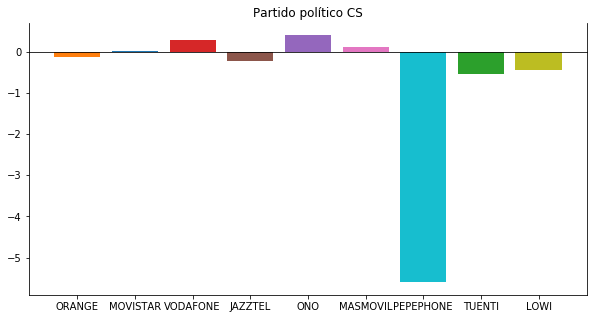

PODEMOS-IU
ORANGE       0.239622
MOVISTAR    -0.230819
VODAFONE     0.085420
JAZZTEL      0.196995
ONO          0.140335
MASMOVIL     2.585109
PEPEPHONE    0.154876
TUENTI       0.485461
LOWI         0.194737
dtype: float64


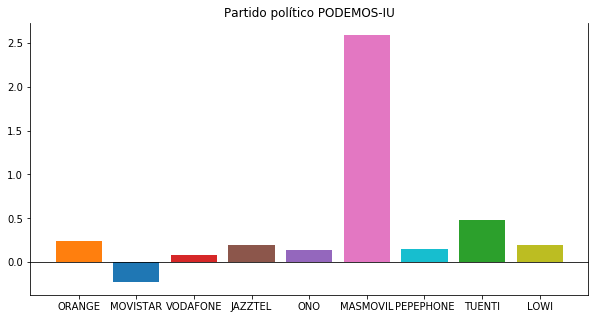

MAS PAIS-EQUO
ORANGE       0.008121
MOVISTAR    -0.099007
VODAFONE     0.221231
JAZZTEL      0.073401
ONO          0.056691
MASMOVIL     1.098267
PEPEPHONE    1.898083
TUENTI       0.000000
LOWI         0.000000
dtype: float64


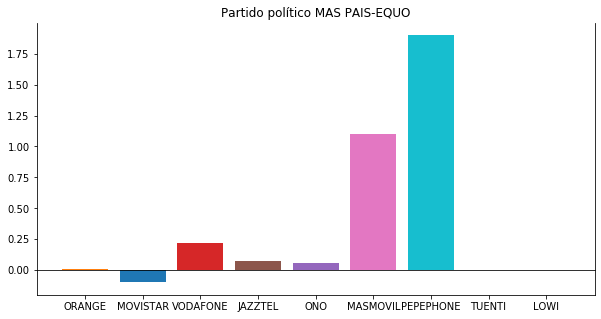

In [21]:
#CON ESTE CÓDIGO SE OBTIENEN LOS COEFICIENTES Y SE GRAFICAN

operador={'Movistar':data.MOVISTAR, 'Vodafone':data.VODAFONE, 'Orange':data.ORANGE, 'Jazztel':data.JAZZTEL,
          'Ono':data.ONO, 'Pepephone':data.PEPEPHONE, 'Lowi':data.LOWI, 'Tuenti':data.TUENTI, 'MásMóvil':data.MASMOVIL}
variables = {'PP':data.PP, 'PSOE':data.PSOE, 'VOX':data.VOX, 'CS':data.CS, 'PODEMOS-IU':data.PODEMOSIU, 
          'MAS PAIS-EQUO':data.MASPAISEQUO}

for variable in variables:
    resultado = variables[variable]
        
    X_train, X_test , y_train, y_test = train_test_split(X, resultado, test_size=0.5, random_state=1)
    alphas = 10**np.linspace(10,-2,100)*0.5
    lasso = Lasso(max_iter = 100000, normalize = True)
    coefs = []

    for a in alphas:
        lasso.set_params(alpha=a)
        lasso.fit(scale(X_train), y_train) 
        coefs.append(lasso.coef_)
    
    
    lassocv = LassoCV(alphas = None, cv = 20, max_iter = 100000, normalize = True)
    
    lassocv.fit(X_train, y_train)
    lasso.set_params(alpha=lassocv.alpha_)
    lasso.fit(X_train, y_train)
   
    pd.Series(lasso.coef_, index=X.columns)
    
    lasso_coefficient=pd.DataFrame()
    lasso_coefficient["Columns"]=X.columns
    lasso_coefficient["Coefficient Estimate"]=pd.Series(lasso.coef_)
    
    #Graficar coeficientes
    print(variable)
    print(pd.Series(lasso.coef_, index=X.columns))
    fig, ax = plt.subplots(figsize =(10, 5)) 
  
    color =['tab:orange', 'tab:blue', 'tab:red',  
    'tab:brown', 'tab:purple', 'tab:pink',   
    'tab:cyan', 'tab:green', 'tab:olive'] 
  
    ax.bar(lasso_coefficient["Columns"],  
    lasso_coefficient['Coefficient Estimate'],  
    color = color) 
      
    ax.spines['top'].set_position('zero') 
  
  #Guardar figura
 
    plt.title('Partido político '+variable)
    plt.savefig(variable+'.jpg')
    plt.show(block = False)
    plt.close(1);